In [26]:
import yt, json, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

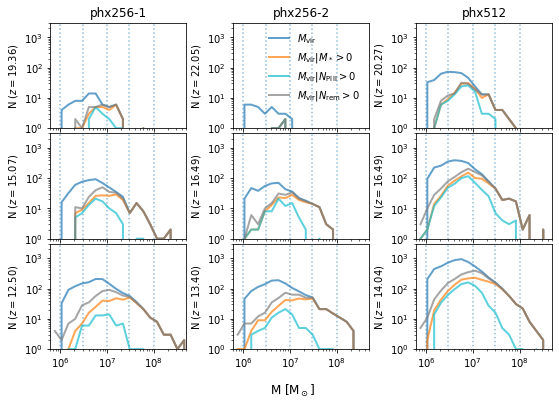

In [35]:
fig, ax = plt.subplots(3,3, sharex=True, figsize=[9,6])
bins = np.linspace(5.5, 9, 25)
bins = 10**bins
sims = ['phx256-1','phx256-2', 'phx512']
outs = [[440, 840, 1240], [280, 680, 1080],[380, 680, 980]]
for j, (sim, dlist) in enumerate(zip(sims, outs)):
    for i, out in enumerate(dlist):
        logfiles = glob.glob('halo_logs/*_%s_RD%04d-*.json'%(sim, out))
        with open(logfiles[0], 'r') as f:
            data = json.load(f)
        for n in range(1, len(logfiles)): # iterate rest of files to combine them all to one file
            with open(logfiles[n], 'r') as f:
                new = json.load(f)
            for k in data.keys():
    #             print(k)
                data[k] += new[k]

        mvir = np.array(data['halo_mvir'])
        mstar = np.array(data['halo_mstar'])
        mgalaxy = mvir[mstar > 0]
        p3gal = np.array(data['halo_live_p3cnt'])
        p3postgal = np.array(data['halo_remnant_p3cnt'])
        mp3r = mvir[p3postgal > 0]
        mp3 = mvir[p3gal > 0]

        mvir = mvir[mvir > 5e5]
        labels = ['$M_{\\rm vir}$', 
                '$M_{\\rm vir} | M_* > 0$',
                '$M_{\\rm vir} | N_{\\rm PIII} > 0$',
                '$M_{\\rm vir} | N_{\\rm rem} > 0$']
        colors = ['tab:blue','tab:orange','tab:cyan','tab:gray']
        pdata = [mvir, mgalaxy, mp3, mp3r]
        maxx=0
        for jj, dat in enumerate(pdata):
            hist, bins = np.histogram(dat, bins=bins)
            pbins = np.array([bins[k]+bins[k+1] for k in range(len(bins)-1)])
            ax[i][j].plot(pbins, hist, label=labels[jj], color=colors[jj], alpha=0.7, linewidth=2)
            maxx = max(max(hist), maxx)
        ax[i][j].vlines([1e6, 3e6, 1e7, 3e7, 1e8], 0, 1e4, linestyles='dotted', alpha=0.5)
        ax[i][j].set_yscale('log')
        ax[i][j].set_xscale('log')
        ax[i][j].set_xlim(6e5, 5e8)
        ax[i][j].set_ylabel('N ($z=$%0.2f)'%data['halo_redshift'][0])
        ax[i][j].set_ylim(1,3e3)

plt.subplots_adjust(hspace=0.05, wspace=0.34)
ax[0][1].legend(frameon=False)
ax[0][0].set_title('phx256-1')
ax[0][1].set_title('phx256-2')
ax[0][2].set_title('phx512')

fig.supxlabel('M [M$_\odot]$')
plt.savefig('./images/phx_halodist.pdf', bbox_inches='tight')